In [1]:
using Plots
using Metal

In [2]:
Metal.versioninfo()

macOS 14.2.1, Darwin 23.2.0

Toolchain:
- Julia: 1.10.1
- LLVM: 15.0.7

Julia packages: 
- Metal.jl: 0.5.1
- Metal_LLVM_Tools_jll: 0.5.1+0

1 device:
- Apple M2 (64.000 KiB allocated)


In [3]:
a₍ₚᵤ = ComplexF32[
0.11310157f0 + 0.016785176f0im
-0.061433744f0 - 0.040833756f0im
-0.033936575f0 - 0.038789015f0im
-0.011902216f0 + 0.0046998495f0im
0.19486064f0 + 0.068514034f0im
0.088442616f0 + 0.013580733f0im
-0.0037537757f0 - 0.16406746f0im
-0.11157564f0 + 0.10730305f0im
-0.035523538f0 + 0.27088222f0im
0.043061607f0 + 0.03668324f0im
0.10882898f0 + 0.11246068f0im
0.18915367f0 + 0.19409767f0im
0.030487984f0 + 0.08938869f0im
-0.15863517f0 + 0.06988737f0im
-0.07568589f0 + 0.030518502f0im
-0.08047729f0 - 0.040040273f0im
0.009430218f0 + 0.27713853f0im
0.21793263f0 + 0.16425058f0im
-0.115634605f0 - 0.17020169f0im
0.017548138f0 - 0.014893029f0im
];

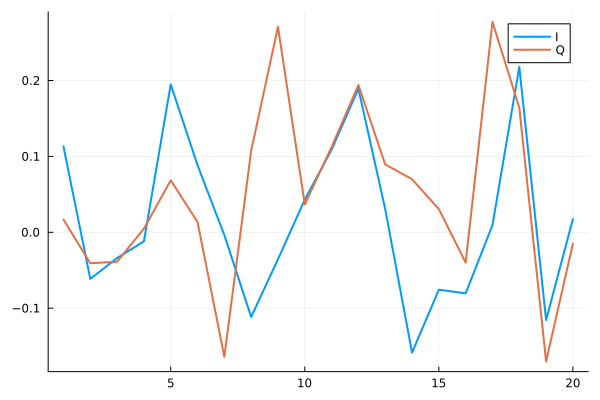

In [10]:
plot(real(a₍ₚᵤ), linewidth = 2, labels="I", legend = :topright)
plot!(imag(a₍ₚᵤ), linewidth = 2, labels="Q")

In [5]:
# allocate + initialize
aₘₑₜₐₗ = MtlArray(a₍ₚᵤ); @show typeof(aₘₑₜₐₗ);

typeof(aₘₑₜₐₗ) = MtlVector{ComplexF32, Metal.MTL.MTLResourceStorageModePrivate}


In [6]:
# perform some GPU-accelerated operations
bₘₑₜₐₗ = aₘₑₜₐₗ .* aₘₑₜₐₗ;

In [7]:
# back to the CPU
b₍ₚᵤ = Array(bₘₑₜₐₗ); @show typeof(bₘₑₜₐₗ);

typeof(bₘₑₜₐₗ) = MtlVector{ComplexF32, Metal.MTL.MTLResourceStorageModePrivate}


# &#x1F4DA; References

- [ ] [Technical preview: Programming Apple M1 GPUs in Julia with Metal.jl](https://juliagpu.org/post/2022-06-24-metal)